In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
neat_labels = {"time": "Time (sec)",
              "SpO2": "SpO2 (%)",
              "MABP": "ABP (mmHg)",
              "temp": "Temperature ($^{\circ}$C)",
              "HbT40": "$\Delta$HbT $(\mu M)$",
              "HbD40": "$\Delta$HbD $(\mu M)$",
              "CCO40": "$\Delta$CCO $(\mu M)$",
              "CO2": "PaCO$_2$ (mmHg)"
          
             }




bcmd_labels = {"time": "t",
              "SpO2": "SaO2sup",
              "MABP": "P_a",
              "temp": "temp",
              "HbT40": "HbT",
              "HbD40": "Hbdiff",
              "CCO40": "CCO",
              "CO2": "PaCO2" 
             }

labels = {bcmd_labels[k]: neat_labels[k] for k in neat_labels.keys()}


In [3]:
def set_text_size(ax, font_size=12):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(font_size)
    return ax


def plot_data(df_list, signals, colpal, labels, ticker_step, titles): 
    import string
    import matplotlib.ticker as ticker
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(nrows=len(signals), ncols=len(df_list), figsize=(6,6), dpi=250, sharex='col', sharey='row')    
    letters = string.ascii_lowercase
    for j, df in enumerate(df_list):
        for i in range(len(signals)):
            ax = axes[i,j]
            ix = i+j*len(signals)
            ax.plot(df['t'], df[signals[i]], color=colpal[i], linewidth=2.0)
            ax.set_ylabel(labels[signals[i]])
            ax.yaxis.set_major_locator(ticker.MultipleLocator(ticker_step[i]))
            #ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
            
            if j ==1:
                ax.tick_params(axis='y', which='both', bottom=False,top=False,labelbottom=False)
                ax.set_ylabel('')
            if i == len(signals)-1:
                ax.set_xlabel(labels['t'])
#             if i == 0:
#                 ax.set_title("{})                   {}".format(letters[ix], titles[j]), loc='left', fontdict={'fontsize': 10}, pad=3)
#             else:
            ax.set_title("{})".format(letters[ix]), loc='left', fontdict={'fontsize': 10}, pad=3)
            ax = set_text_size(ax, 11)
    
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.285, wspace=0.05, bottom=0.2)
    return fig, axes

In [4]:
neo007 = pd.read_csv('neo007_mat.csv')
neo007['temp'] = [33.5]*neo007.shape[0]
bcmd_neo007 = neo007.copy().rename(index=str, columns=bcmd_labels)

neo021 = pd.read_csv('neo021_mat.csv')
neo021['temp'] = [33.5]*neo007.shape[0]
bcmd_neo021 = neo021.copy().rename(index=str, columns=bcmd_labels)

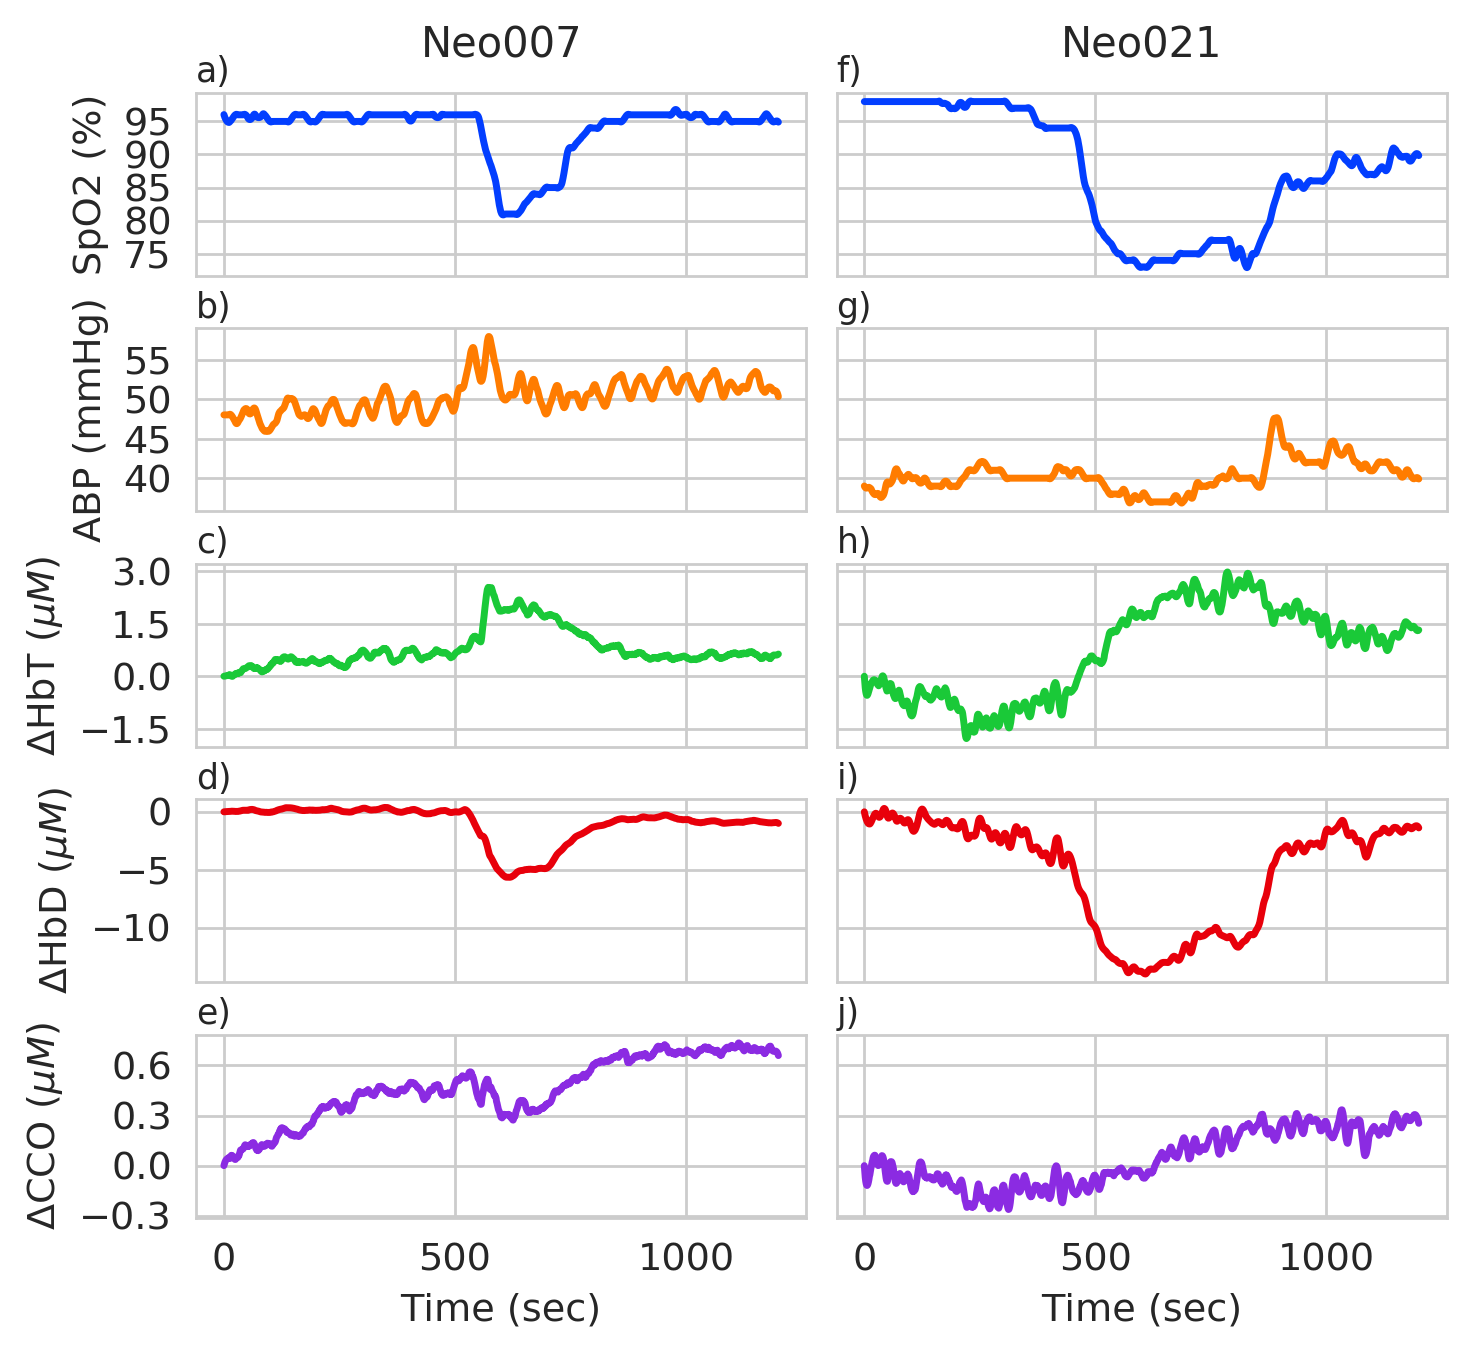

In [5]:
signals = ['SaO2sup', 'P_a', 'HbT' ,'Hbdiff', 'CCO']
ticker_step = [5, 5, 1.5, 5, 0.3]
colpal = sns.color_palette("bright", n_colors=len(signals))
titles=['Neo007', 'Neo021']
# neo007_plot = neo007.copy().rename(index=str, columns=labels)
fig, axes = plot_data([bcmd_neo007, bcmd_neo021], signals, colpal, labels, ticker_step, titles)
for ax, col in zip(axes[0], titles):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 10),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
    
fig.savefig('/home/buck06191/Dropbox/phd/neonate_desat/Figures/input_data/neonatal_data.png', bbox_inches='tight', dpi=300)

# Formatting for use in SA and Bayesian

In [6]:
formatted_neo007 = neo007.copy().rename(index=str, columns=bcmd_labels)
formatted_neo007['SaO2sup'] = formatted_neo007['SaO2sup']/100
formatted_neo007.to_csv('neo007_formatted.csv', index=False)

In [7]:
formatted_neo021 = neo021.copy().rename(index=str, columns=bcmd_labels)
formatted_neo021['SaO2sup'] = formatted_neo021['SaO2sup']/100
formatted_neo021.to_csv('neo021_formatted.csv', index=False)

In [8]:
formatted_neo007.iloc[0,:]

PaCO2       4.707091
SaO2sup     0.960341
P_a        48.000000
Hbdiff      0.000000
HbT         0.000000
CCO         0.000000
t           0.000000
temp       33.500000
Name: 0, dtype: float64

In [9]:
formatted_neo021.iloc[0,:]

PaCO2       5.300000
SaO2sup     0.980000
P_a        39.011847
Hbdiff      0.000000
HbT         0.000000
CCO         0.000000
t           0.000000
temp       33.500000
Name: 0, dtype: float64